In [ ]:
# 從google.colab庫中導入drive模組，連線到google drive
# 將google drive掛載到colab環境上，並將掛載路徑設置為'/content/gdrive/'
# 設定force_remount=True以強制重新掛載，以防google drive已經掛載
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

# 導入os模組以與操作系統進行互動
# 將當前工作目錄更改為google drive中指定的路徑
# 執行'ls'，列出指定目錄中的文件和目錄
import os
os.chdir("/content/gdrive/My Drive/112_2_LATIA/hw1_0409/")
!ls -l "/content/gdrive/My Drive/112_2_LATIA/hw1_0409/"

Mounted at /content/gdrive/
total 30906
-rw------- 1 root root   487897 Apr  2 08:15 112_sdata.csv
-rw------- 1 root root 10499104 Jun 21  2021 SimSun.ttf
-rw------- 1 root root 20659344 Apr  2 15:51 TaipeiSansTCBeta-Regular.ttf


In [ ]:
# 導入pandas庫並將其縮寫為pd
# 從matplotlib庫中導入pyplot模組並將其縮寫為plt
# 從matplotlib庫中導入font_manager模組
# 導入seaborn庫並將其縮寫為sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

# 定義csv文件名稱為csv_file
# 使用pandas的read_csv函數讀取csv文件並將其存儲在df(dataframe)中
csv_file = "112_sdata.csv"
df = pd.read_csv(csv_file)

# 將台北黑體字體添加到字體管理器中
# 將matplotlib的字體設置為台北黑體
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

In [ ]:
# 刪除df中包含缺失值的行(其缺失值為各學院行政人員，校務行政人員等不相關的資料)
df = df.dropna()

# 初始化空列表change_code_list(list)以存儲修改後的科系代碼
# 對df['科系代碼']每個科系代碼進行迴圈
# 將每個科系代碼的前兩位字元提取出來並加到change_code_list(list)
# 將change_code_list(list)加到df中作為新的列df['學院代碼']
change_code_list=[]
for code in df['科系代碼']:
  change_code_list.append(code[:2])
df['學院代碼']=change_code_list

# 定義學院代碼到學院名稱的映射字典code_to_academy(dict)
# 將學院代碼映射到學院名稱並添加到df中作為新的列df['學院名稱']
code_to_academy={
    "01":"教育領域",
    "02":"藝術及人文領域",
    "03":"社會科學、新聞學及圖書資訊領域",
    "04":"商業、管理及法律領域",
    "05":"自然科學、數學及統計領域",
    "06":"資訊通訊科技領域",
    "07":"工程、製造及營建領域",
    "08":"農業、林業、漁業及獸醫領域",
    "09":"醫藥衛生及社會福利領域",
    "10":"服務領域",
    "99":"其他領域"
}
df['學院名稱']=df['學院代碼'].map(code_to_academy)

# 初始化空列表change_level_list(list)以存儲修改後的等級別
# 對df['等級別']中的每個等級別進行迴圈
# 將每個等級別轉換為字串後把第二位後的字元提取出來並加到change_level_list(list)
# 將change_level_list(list)加到df中作為新的列df['等級']
change_level_list=[]
for level in df['等級別']:
  change_level_list.append(str(level)[1:])
df['等級']=change_level_list

# 初始化空列表change_city_list(list)以存儲修改後的縣市名稱
# 對df['縣市名稱']中的每個縣市名稱進行迴圈
# 將縣市名稱中的最後三個字元提取出來並加到change_city_list(list)
# 將change_city_list(list)加到df中作為新的列df['縣市']
change_city_list=[]
for city in df['縣市名稱']:
  change_city_list.append(city[-3:])
df['縣市']=change_city_list

# 印出修改後的df
print(df)

# 定義函數corrtype，傳入一筆資料的相關係數，回傳其相關性
def corrtype(corr):
  if corr==0:
    return "無線性關係"
  elif corr>=-0.3 and corr<=0.3:
    return "低度正相關" if corr>=0 else "低度負相關"
  elif corr>=-0.6 and corr<=0.6:
    return "中度正相關" if corr>=0 else "中度負相關"
  elif corr>=-0.9 and corr<=0.9:
    return "高度正相關" if corr>=0 else "高度負相關"
  else:
    return "完全正相關" if corr>=0 else "完全負相關"

      學年度  學校代碼      學校名稱      科系代碼        科系名稱 日間∕進修別   等級別  學生數  教師數  \
0     112     1    國立政治大學  01111001        教育學系    D 日  D 博士  105    0   
1     112     1    國立政治大學  01111001        教育學系    D 日  M 碩士   41    0   
2     112     1    國立政治大學  01111001        教育學系    D 日  B 學士  212   12   
3     112     1    國立政治大學  01114005  教育行政與政策研究所    D 日  M 碩士   48    1   
4     112     1    國立政治大學  01114006  學校行政碩士在職專班    N 職  M 碩士   89    0   
...   ...   ...       ...       ...         ...    ...   ...  ...  ...   
4391  112   222  國立臺東專科學校  08121011      園藝暨景觀科    D 日  2 二專   31    0   
4392  112   222  國立臺東專科學校  08121011      園藝暨景觀科    N 修  2 二專   62    0   
4393  112   222  國立臺東專科學校  08121011      園藝暨景觀科    D 日  5 五專   14    7   
4394  112   222  國立臺東專科學校  10131014       餐旅管理科    D 日  2 二專   34    0   
4395  112   222  國立臺東專科學校  10131014       餐旅管理科    D 日  5 五專   84    6   

      上學年度畢業生數    縣市名稱   體系別 學院代碼           學院名稱   等級   縣市  
0           20  30 臺北市  1 一般   01           教育領域  

<ipython-input-29-8b814384f354>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['學院代碼']=change_code_list
<ipython-input-29-8b814384f354>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['學院名稱']=df['學院代碼'].map(code_to_academy)
<ipython-input-29-8b814384f354>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

# 1. 各大學的總科系數為何？

國立政治大學 有 74 個科系
國立清華大學 有 107 個科系
國立臺灣大學 有 147 個科系
國立臺灣師範大學 有 68 個科系
國立成功大學 有 102 個科系
國立中興大學 有 84 個科系
國立陽明交通大學 有 129 個科系
國立中央大學 有 55 個科系
國立中山大學 有 58 個科系
國立臺灣海洋大學 有 36 個科系
國立中正大學 有 45 個科系
國立高雄師範大學 有 40 個科系
國立彰化師範大學 有 41 個科系
國立臺北大學 有 33 個科系
國立嘉義大學 有 49 個科系
國立高雄大學 有 31 個科系
國立東華大學 有 51 個科系
國立暨南國際大學 有 42 個科系
國立臺灣科技大學 有 36 個科系
國立雲林科技大學 有 42 個科系
國立屏東科技大學 有 45 個科系
國立臺北科技大學 有 46 個科系
國立臺北藝術大學 有 20 個科系
國立臺灣藝術大學 有 24 個科系
國立臺東大學 有 33 個科系
國立宜蘭大學 有 25 個科系
國立聯合大學 有 24 個科系
國立虎尾科技大學 有 24 個科系
國立臺南藝術大學 有 16 個科系
國立臺南大學 有 26 個科系
國立臺北教育大學 有 25 個科系
國立臺中教育大學 有 23 個科系
國立澎湖科技大學 有 13 個科系
國立勤益科技大學 有 21 個科系
國立體育大學 有 15 個科系
國立臺北護理健康大學 有 14 個科系
國立高雄餐旅大學 有 18 個科系
國立金門大學 有 23 個科系
國立臺灣體育運動大學 有 10 個科系
國立臺中科技大學 有 26 個科系
國立臺北商業大學 有 17 個科系
國立屏東大學 有 49 個科系
國立高雄科技大學 有 71 個科系
國立臺灣戲曲學院 有 6 個科系
國立臺南護理專科學校 有 3 個科系
國立臺東專科學校 有 9 個科系



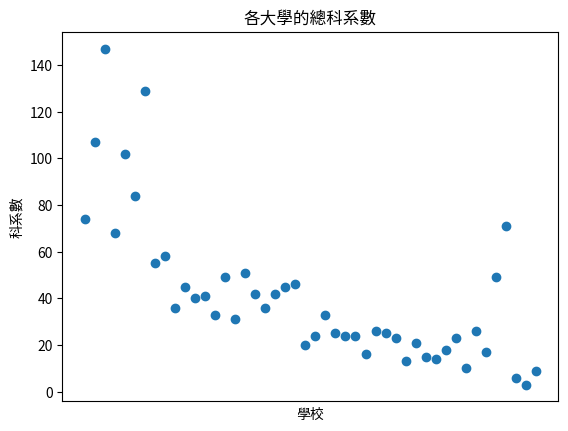


總共有 46 所學校，總共有 1896 個科系，每所學校平均有 41.22 個科系
其中最多科系數的學校是 國立臺灣大學 有 147 個科系
其中最少科系數的學校是 國立臺南護理專科學校 有 3 個科系


In [ ]:
# 從df根據'學校名稱'和'科系代碼'欄位去除重複行，並將結果存在df1(dataframe)
# 將每個學校名稱存到school_list(list)
# 計算每個學校名稱對應的科系數，存到count(series)
df1=df.drop_duplicates(subset=['學校名稱','科系代碼'])
school_list=list(df['學校名稱'].unique())
count=df1['學校名稱'].value_counts()

# 初始化列表department_per_school_list(list)以存儲每所學校的科系數
# 對school_list(list)中每個學校名稱進行迴圈
# 印出每個學校名稱對應的科系數
# 將每個學校名稱對應的科系數加到department_per_school_list(list)
department_per_school_list=[]
for school in school_list:
  print(f"{school} 有 {count[school]} 個科系")
  department_per_school_list.append(count[school])
print()

# 繪製散布圖，x軸為學校名稱，y軸為每個學校名稱對應的科系數量
# 不顯示x軸刻度(因為太多字了，會很亂)
# 設置圖表標題為"各大學的總科系數"
# 設置x軸標籤為"學校"
# 設置y軸標籤為"科系數"
# 顯示圖表
plt.scatter(school_list,department_per_school_list)
plt.xticks([])
plt.title("各大學的總科系數")
plt.xlabel("學校")
plt.ylabel("科系數")
plt.show()

# 印出總共的學校數，總科系數和每所學校平均的科系數
# 印出科系數最多和最少的學校和其科系數
print()
print(f"總共有 {len(school_list)} 所學校，總共有 {sum(department_per_school_list)} 個科系，每所學校平均有 {sum(department_per_school_list)/len(school_list):.2f} 個科系")
print(f"其中最多科系數的學校是 {school_list[department_per_school_list.index(max(department_per_school_list))]} 有 {max(department_per_school_list)} 個科系")
print(f"其中最少科系數的學校是 {school_list[department_per_school_list.index(min(department_per_school_list))]} 有 {min(department_per_school_list)} 個科系")

# 2. 各大學的師生比例為何？

國立政治大學 的師生比為 1:27.84
國立清華大學 的師生比為 1:23.14
國立臺灣大學 的師生比為 1:16.7
國立臺灣師範大學 的師生比為 1:20.67
國立成功大學 的師生比為 1:17.99
國立中興大學 的師生比為 1:18.66
國立陽明交通大學 的師生比為 1:20.16
國立中央大學 的師生比為 1:21.11
國立中山大學 的師生比為 1:17.69
國立臺灣海洋大學 的師生比為 1:22.81
國立中正大學 的師生比為 1:23.17
國立高雄師範大學 的師生比為 1:27.6
國立彰化師範大學 的師生比為 1:24.26
國立臺北大學 的師生比為 1:27.96
國立嘉義大學 的師生比為 1:24.59
國立高雄大學 的師生比為 1:27.31
國立東華大學 的師生比為 1:23.79
國立暨南國際大學 的師生比為 1:26.65
國立臺灣科技大學 的師生比為 1:23.2
國立雲林科技大學 的師生比為 1:25.72
國立屏東科技大學 的師生比為 1:25.6
國立臺北科技大學 的師生比為 1:30.76
國立臺北藝術大學 的師生比為 1:20.34
國立臺灣藝術大學 的師生比為 1:39.66
國立臺東大學 的師生比為 1:26.53
國立宜蘭大學 的師生比為 1:27.15
國立聯合大學 的師生比為 1:30.12
國立虎尾科技大學 的師生比為 1:35.65
國立臺南藝術大學 的師生比為 1:17.24
國立臺南大學 的師生比為 1:28.12
國立臺北教育大學 的師生比為 1:27.21
國立臺中教育大學 的師生比為 1:26.24
國立澎湖科技大學 的師生比為 1:24.79
國立勤益科技大學 的師生比為 1:44.22
國立體育大學 的師生比為 1:29.04
國立臺北護理健康大學 的師生比為 1:27.33
國立高雄餐旅大學 的師生比為 1:34.42
國立金門大學 的師生比為 1:29.35
國立臺灣體育運動大學 的師生比為 1:32.13
國立臺中科技大學 的師生比為 1:40.68
國立臺北商業大學 的師生比為 1:36.45
國立屏東大學 的師生比為 1:27.77
國立高雄科技大學 的師生比為 1:34.9
國立臺灣戲曲學院 的師生比為 1:15.66
國立臺南護理專科學校 的師生比為 1:25.1
國立臺

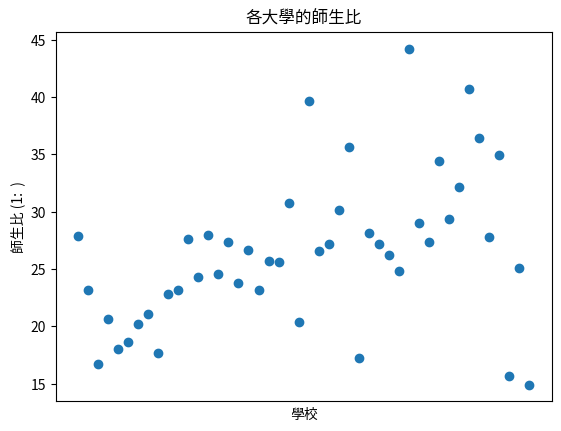


每所學校平均的師生比為 1:26.36
其中師生比最高的學校是 國立勤益科技大學 師生比為 1:44.22
其中師生比最低的學校是 國立臺東專科學校 師生比為 1:14.91


In [ ]:
# 從df中選擇'學校名稱'，'學生數'和'教師數'欄位，並存在df2(dataframe)
# 依照'學校名稱'欄位對df2進行分組，並對'學生數'和'教師數'進行求和
df2=df[['學校名稱','學生數','教師數']]
df2=df2.groupby(by=['學校名稱']).sum()

# 初始化列表stratio_per_school_list(list)以存儲每個學校名稱對應的師生比
# 對school_list(list)中每個學校名稱進行迴圈
# 對df2的索引進行迴圈
# 若df2的索引為指定的學校名稱(確保school_list(list)和stratio_per_school_list(list)的排序是一樣的，因為groupby回傳的資料會依大到小排序)
# 印出每個學校名稱對應的師生比
# 將每個學校名稱對應的師生比加到stratio_per_school_list(list)
stratio_per_school_list=[]
for school in school_list:
  for i in range(len(df2)):
    if df2.index[i]==school:
      print(f"{school} 的師生比為 1:{round(df2['學生數'][i]/df2['教師數'][i],2)}")
      stratio_per_school_list.append(round(df2['學生數'][i]/df2['教師數'][i],2))
print()

# 繪製散布圖，x軸為學校名稱，y軸為每個學校名稱對應的師生比
# 設置圖表標題為"各大學的師生比"
# 不顯示x軸刻度(因為太多字了，會很亂)
# 設置x軸標籤為"學校"
# 設置y軸標籤為"師生比 (1:  )""
# 顯示圖表
plt.scatter(school_list,stratio_per_school_list)
plt.title("各大學的師生比")
plt.xticks([])
plt.xlabel("學校")
plt.ylabel("師生比 (1:  )")
plt.show()

# 印出每所學校平均的師生比
# 印出師生比最多和最少的學校和其師生比
print()
print(f"每所學校平均的師生比為 1:{sum(stratio_per_school_list)/len(school_list):.2f}")
print(f"其中師生比最高的學校是 {school_list[stratio_per_school_list.index(max(stratio_per_school_list))]} 師生比為 1:{max(stratio_per_school_list)}")
print(f"其中師生比最低的學校是 {school_list[stratio_per_school_list.index(min(stratio_per_school_list))]} 師生比為 1:{min(stratio_per_school_list)}")

# 3. 各大學的總科系數與師生比的關係為何？

國立政治大學 中總共有 74 個科系，師生比為 1:27.84
國立清華大學 中總共有 107 個科系，師生比為 1:23.14
國立臺灣大學 中總共有 147 個科系，師生比為 1:16.7
國立臺灣師範大學 中總共有 68 個科系，師生比為 1:20.67
國立成功大學 中總共有 102 個科系，師生比為 1:17.99
國立中興大學 中總共有 84 個科系，師生比為 1:18.66
國立陽明交通大學 中總共有 129 個科系，師生比為 1:20.16
國立中央大學 中總共有 55 個科系，師生比為 1:21.11
國立中山大學 中總共有 58 個科系，師生比為 1:17.69
國立臺灣海洋大學 中總共有 36 個科系，師生比為 1:22.81
國立中正大學 中總共有 45 個科系，師生比為 1:23.17
國立高雄師範大學 中總共有 40 個科系，師生比為 1:27.6
國立彰化師範大學 中總共有 41 個科系，師生比為 1:24.26
國立臺北大學 中總共有 33 個科系，師生比為 1:27.96
國立嘉義大學 中總共有 49 個科系，師生比為 1:24.59
國立高雄大學 中總共有 31 個科系，師生比為 1:27.31
國立東華大學 中總共有 51 個科系，師生比為 1:23.79
國立暨南國際大學 中總共有 42 個科系，師生比為 1:26.65
國立臺灣科技大學 中總共有 36 個科系，師生比為 1:23.2
國立雲林科技大學 中總共有 42 個科系，師生比為 1:25.72
國立屏東科技大學 中總共有 45 個科系，師生比為 1:25.6
國立臺北科技大學 中總共有 46 個科系，師生比為 1:30.76
國立臺北藝術大學 中總共有 20 個科系，師生比為 1:20.34
國立臺灣藝術大學 中總共有 24 個科系，師生比為 1:39.66
國立臺東大學 中總共有 33 個科系，師生比為 1:26.53
國立宜蘭大學 中總共有 25 個科系，師生比為 1:27.15
國立聯合大學 中總共有 24 個科系，師生比為 1:30.12
國立虎尾科技大學 中總共有 24 個科系，師生比為 1:35.65
國立臺南藝術大學 中總共有 16 個科系，師生比為 1:17.24
國立臺南大學 中總共有 26 個科系，師生比為 1:28.12
國立臺北教育大學 中總共

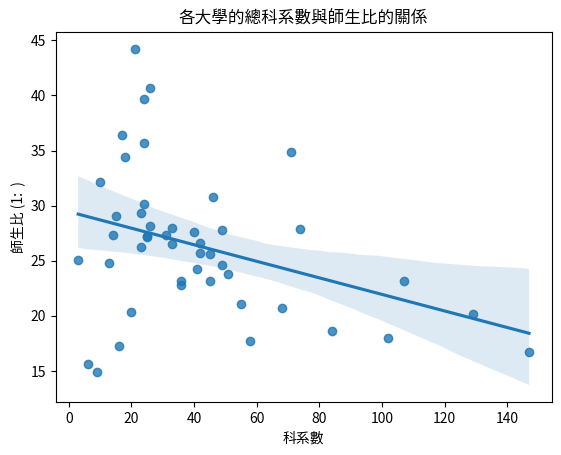


各大學的總科系數與師生比的相關係數為 -0.36 屬於 中度負相關


In [ ]:
# 建立一個包含每個學校名稱對應的科系數和師生比的資料school_stratio(dataframe)
school_stratio=pd.DataFrame({
    "department":department_per_school_list,
    "stratio":stratio_per_school_list
})

# 印出每個學校名稱對應的科系數和師生比
for i in range(len(school_list)):
  print(f"{school_list[i]} 中總共有 {department_per_school_list[i]} 個科系，師生比為 1:{stratio_per_school_list[i]}")
print()

# 繪製每個學校名稱對應的科系數和師生比之間的回歸圖
# 設置圖表標題為"各大學的總科系數與師生比的關係"
# 設置x軸標籤為"科系數"
# 設置y軸標籤為"師生比 (1:  )""
# 顯示圖表
sns.regplot(data=school_stratio,x=school_stratio['department'],y=school_stratio['stratio'])
plt.title("各大學的總科系數與師生比的關係")
plt.xlabel("科系數")
plt.ylabel("師生比 (1:  )")
plt.show()

# 印出各大學的總科系數與師生比的相關係數和其相關性
print()
print(f"各大學的總科系數與師生比的相關係數為 {round(school_stratio.corr()['department'][1],2)} 屬於 {corrtype(round(school_stratio.corr()['department'][1],2))}")

# 4. 各學院的總科系數為何？

教育領域 有 103 個科系
藝術及人文領域 有 257 個科系
社會科學、新聞學及圖書資訊領域 有 118 個科系
商業、管理及法律領域 有 223 個科系
自然科學、數學及統計領域 有 196 個科系
資訊通訊科技領域 有 96 個科系
醫藥衛生及社會福利領域 有 122 個科系
工程、製造及營建領域 有 321 個科系
其他領域 有 16 個科系
農業、林業、漁業及獸醫領域 有 66 個科系
服務領域 有 79 個科系



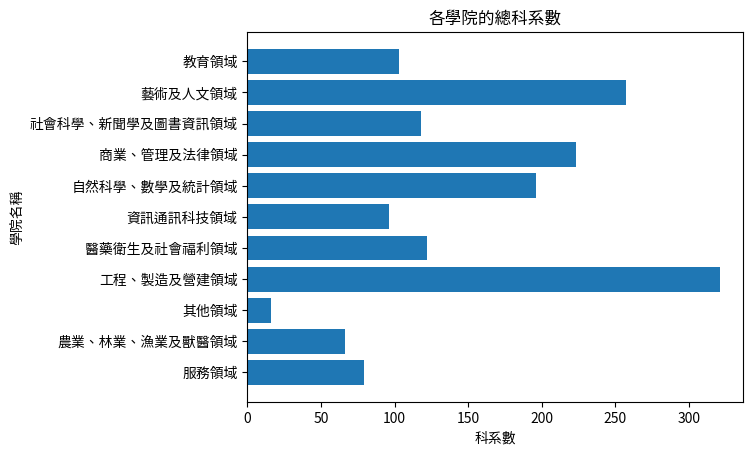


總共有 11 個學院，總共有 1597 個科系，每個學院平均有 145.18 個科系
其中科系數最多的學院是 工程、製造及營建領域 有 321 個科系
其中科系數最少的學院是 其他領域 有 16 個科系


In [ ]:
# 從df根據'科系代碼'和'學院名稱'欄位去除重複行，並將結果存在df4(dataframe)
# 將每個學院名稱存在academy_list(list)
# 計算每個學院名稱對應的科系數，存到count(series)
df4=df.drop_duplicates(subset=['科系代碼','學院名稱'])
academy_list=list(df['學院名稱'].unique())
count=df4['學院名稱'].value_counts()

# 初始化列表department_per_academy_list(list)以存儲每個學院名稱對應的科系數
# 對academy_list(list)中每個學院名稱進行迴圈
# 印出每個學院名稱對應的科系數
# 將每個學院名稱對應的科系數加到department_per_academy_list(list)
department_per_academy_list=[]
for academy in academy_list:
  print(f"{academy} 有 {count[academy]} 個科系")
  department_per_academy_list.append(count[academy])
print()

# 繪製水平條形圖，x軸為每個學院名稱對應的科系數，y軸為學院名稱
# 設置圖表標題為"各學院的總科系數"
# 設置x軸標籤為"科系數"
# 設置y軸標籤為"學院名稱"
# 顯示圖表
plt.barh(academy_list[::-1],department_per_academy_list[::-1])
plt.title("各學院的總科系數")
plt.xlabel("科系數")
plt.ylabel("學院名稱")
plt.show()

# 印出總共的學院數、總科系數和每個學院平均的科系數
# 印出科系數最多和最少的學院和其科系數
print()
print(f"總共有 {len(academy_list)} 個學院，總共有 {sum(department_per_academy_list)} 個科系，每個學院平均有 {sum(department_per_academy_list)/len(academy_list):.2f} 個科系")
print(f"其中科系數最多的學院是 {academy_list[department_per_academy_list.index(max(department_per_academy_list))]} 有 {max(department_per_academy_list)} 個科系")
print(f"其中科系數最少的學院是 {academy_list[department_per_academy_list.index(min(department_per_academy_list))]} 有 {min(department_per_academy_list)} 個科系")

# 5. 各學院學生數比例分別為何？

教育領域 中有 28127 位學生
藝術及人文領域 中有 63678 位學生
社會科學、新聞學及圖書資訊領域 中有 26277 位學生
商業、管理及法律領域 中有 74510 位學生
自然科學、數學及統計領域 中有 34015 位學生
資訊通訊科技領域 中有 34444 位學生
醫藥衛生及社會福利領域 中有 21089 位學生
工程、製造及營建領域 中有 132105 位學生
其他領域 中有 1462 位學生
農業、林業、漁業及獸醫領域 中有 14713 位學生
服務領域 中有 20926 位學生



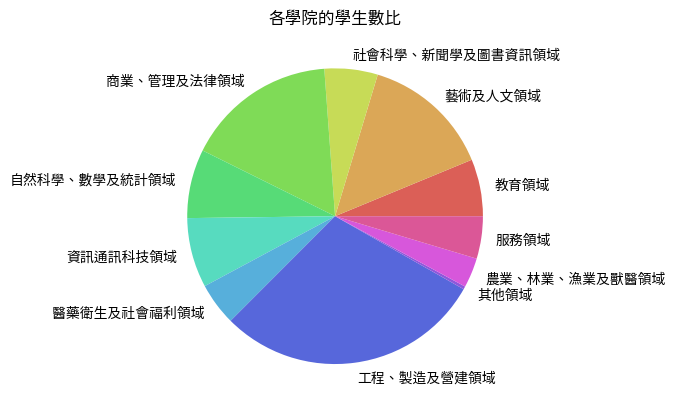


各學院平均的學生數為 41031.45
其中學生數最多的學院是 工程、製造及營建領域 有 132105 為學生，佔總學生數的 29.27%
其中學生數最少的學院是 其他領域 有 1462 為學生，佔總學生數的 0.32%


In [ ]:
# 從df中選擇'學生數'和'學院名稱'欄位，並存到df5(dataframe)
# 依照'學院名稱'欄位對df5進行分組，並對'學生數'進行求和
df5=df[['學生數','學院名稱']]
df5=df5.groupby(by=['學院名稱']).sum()

# 初始化列表student_per_academy_list(list)以存儲每個學院名稱對應的學生數
# 對academy_list(list)中每個學院名稱進行迴圈
# 若df5的索引為指定的學院名稱(確保academy_list(list)和student_per_academy_list(list)的排序是一樣的，因為groupby回傳的資料會依大到小排序)
# 印出每個學院名稱對應的學生數
# 將每個學院名稱對應的學生數加到student_per_academy_list(list)
student_per_academy_list=[]
for academy in academy_list:
  for i in range(len(df5)):
    if df5.index[i]==academy:
      print(f"{df5.index[i]} 中有 {df5['學生數'][i]} 位學生")
      student_per_academy_list.append(df5['學生數'][i])
print()

# 使用seaborn庫生成顏色調色板
# 繪製圓餅圖，以學生數作為比例，學院名稱作為標籤
# 設置圖表標題為"各學院的學生數比"
# 顯示圖表
colors = sns.color_palette('hls', 11)
plt.pie(student_per_academy_list,labels=academy_list,colors=colors)
plt.title("各學院的學生數比")
plt.show()

# 印出每個學院平均的學生數
# 印出學生數最多和最少的學院，其學生數和佔總學生數的比例
print()
print(f"各學院平均的學生數為 {round(sum(student_per_academy_list)/len(academy_list),2)}")
print(f"其中學生數最多的學院是 {academy_list[student_per_academy_list.index(max(student_per_academy_list))]} 有 {max(student_per_academy_list)} 為學生，佔總學生數的 {round(100*max(student_per_academy_list)/sum(student_per_academy_list),2)}%")
print(f"其中學生數最少的學院是 {academy_list[student_per_academy_list.index(min(student_per_academy_list))]} 有 {min(student_per_academy_list)} 為學生，佔總學生數的 {round(100*min(student_per_academy_list)/sum(student_per_academy_list),2)}%")

# 6. 各學院教師數比例分別為何？

教育領域 中有 1070 位教師
藝術及人文領域 中有 3029 位教師
社會科學、新聞學及圖書資訊領域 中有 1079 位教師
商業、管理及法律領域 中有 2170 位教師
自然科學、數學及統計領域 中有 2224 位教師
資訊通訊科技領域 中有 1157 位教師
醫藥衛生及社會福利領域 中有 1648 位教師
工程、製造及營建領域 中有 4742 位教師
其他領域 中有 49 位教師
農業、林業、漁業及獸醫領域 中有 682 位教師
服務領域 中有 655 位教師



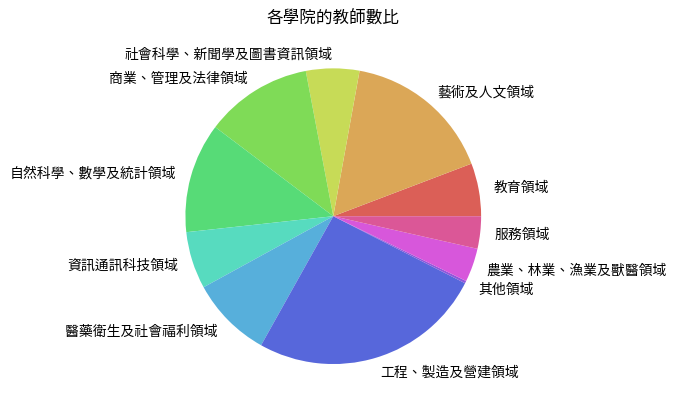


各學院平均的教師數為 1682.27
其中教師數最多的學院是 工程、製造及營建領域 有 4742 位教師，佔總教師數的 25.63%
其中教師數最少的學院是 其他領域 有 49 位教師，佔總教師數的 0.26%


In [ ]:
# 從df中選擇'教師數'和'學院名稱'欄位，並存到df6(dataframe)
# 依照'學院名稱'欄位對df6進行分組，並對'教師數'進行求和
df6=df[['教師數','學院名稱']]
df6=df6.groupby(by=['學院名稱']).sum()

# 初始化列表teacher_per_academy_list(list)以存儲每個學院名稱對應的教師數
# 對academy_list(list)中每個學院名稱進行迴圈
# 若df6的索引為指定的學院名稱(確保academy_list(list)和teacher_per_academy_list(list)的排序是一樣的，因為groupby回傳的資料會依大到小排序)
# 印出每個學校名稱對應的教師數
# 將每個學校名稱對應的教師數加到teacher_per_academy_list(list)
teacher_per_academy_list=[]
for academy in academy_list:
  for i in range(len(df6)):
    if df6.index[i]==academy:
      print(f"{df6.index[i]} 中有 {df6['教師數'][i]} 位教師")
      teacher_per_academy_list.append(df6['教師數'][i])
print()

# 使用seaborn庫生成顏色調色板
# 繪製圓餅圖，以教師數作為比例，學院名稱作為標籤
# 設置圖表標題為"各學院的教師數比"
# 顯示圖表
colors = sns.color_palette('hls', 11)
plt.pie(teacher_per_academy_list,labels=academy_list,colors=colors)
plt.title("各學院的教師數比")
plt.show()

# 印出每個學院平均的教師數
# 印出教師數最多和最少的學院，其教師數和佔總教師數的比例
print()
print(f"各學院平均的教師數為 {round(sum(teacher_per_academy_list)/len(academy_list),2)}")
print(f"其中教師數最多的學院是 {academy_list[teacher_per_academy_list.index(max(teacher_per_academy_list))]} 有 {max(teacher_per_academy_list)} 位教師，佔總教師數的 {round(100*max(teacher_per_academy_list)/sum(teacher_per_academy_list),2)}%")
print(f"其中教師數最少的學院是 {academy_list[teacher_per_academy_list.index(min(teacher_per_academy_list))]} 有 {min(teacher_per_academy_list)} 位教師，佔總教師數的 {round(100*min(teacher_per_academy_list)/sum(teacher_per_academy_list),2)}%")

# 7. 各學院的總科系數與師生比的關係為何？

教育領域 中總共有 103 個科系，師生比例為 1:26.29
藝術及人文領域 中總共有 257 個科系，師生比例為 1:21.02
社會科學、新聞學及圖書資訊領域 中總共有 118 個科系，師生比例為 1:24.35
商業、管理及法律領域 中總共有 223 個科系，師生比例為 1:34.34
自然科學、數學及統計領域 中總共有 196 個科系，師生比例為 1:15.29
資訊通訊科技領域 中總共有 96 個科系，師生比例為 1:29.77
醫藥衛生及社會福利領域 中總共有 122 個科系，師生比例為 1:12.8
工程、製造及營建領域 中總共有 321 個科系，師生比例為 1:27.86
其他領域 中總共有 16 個科系，師生比例為 1:29.84
農業、林業、漁業及獸醫領域 中總共有 66 個科系，師生比例為 1:21.57
服務領域 中總共有 79 個科系，師生比例為 1:31.95



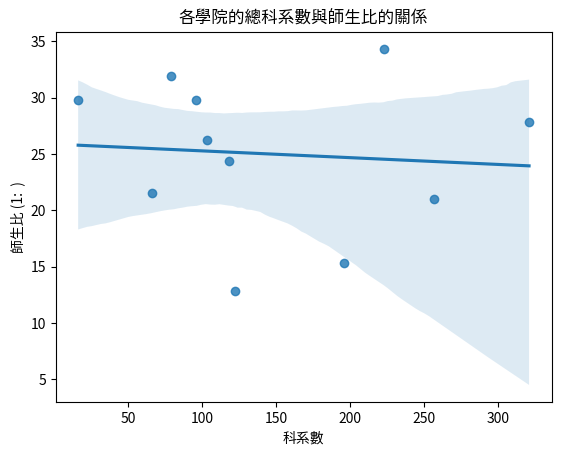


各學院的總科系數與師生比的相關係數為 -0.08 屬於 低度負相關


In [ ]:
# 將student_per_academy_list(list)轉換為student_per_academy(series)
# 將teacher_per_academy_list(list)轉換為teacher_per_academy(series)
# 計算每個學院名稱對應的師生比，並存在stratio_per_academy_list(list)
student_per_academy=pd.Series(student_per_academy_list)
teacher_per_academy=pd.Series(teacher_per_academy_list)
stratio_per_academy_list=round(student_per_academy/teacher_per_academy,2)

# 建立一個包含每個學院名稱對應的科系數和師生比的資料department_stratio(dataframe)
academy_stratio=pd.DataFrame({
 "department":department_per_academy_list,
 "stratio":stratio_per_academy_list
})

# 印出每個學院名稱對應的科系數和師生比
for i in range(len(academy_list)):
  print(f"{academy_list[i]} 中總共有 {department_per_academy_list[i]} 個科系，師生比例為 1:{stratio_per_academy_list[i]}")
print()

# 繪製每個學院名稱對應的科系數和師生比之間的回歸圖
# 設置圖表標題為"各學院的總科系數與師生比的關係"
# 設置x軸標籤為"科系數"
# 設置y軸標籤為"師生比 (1:  )"
# 顯示圖表
sns.regplot(data=academy_stratio,x=academy_stratio['department'],y=academy_stratio['stratio'])
plt.title("各學院的總科系數與師生比的關係")
plt.xlabel("科系數")
plt.ylabel("師生比 (1:  )")
plt.show()

# 印出各學院的總科系數與師生比的相關係數和其相關性
print()
print(f"各學院的總科系數與師生比的相關係數為 {round(academy_stratio.corr()['department'][1],2)} 屬於 {corrtype(round(academy_stratio.corr()['department'][1],2))}")

# 8. 各縣市的總科系數為何？

臺北市 中總共有 453 個科系
新竹市 中總共有 236 個科系
臺南市 中總共有 147 個科系
臺中市 中總共有 164 個科系
桃園市 中總共有 70 個科系
高雄市 中總共有 218 個科系
基隆市 中總共有 36 個科系
嘉義縣 中總共有 45 個科系
彰化縣 中總共有 41 個科系
新北市 中總共有 57 個科系
嘉義市 中總共有 49 個科系
花蓮縣 中總共有 51 個科系
南投縣 中總共有 42 個科系
雲林縣 中總共有 66 個科系
屏東縣 中總共有 94 個科系
臺東縣 中總共有 42 個科系
宜蘭縣 中總共有 25 個科系
苗栗縣 中總共有 24 個科系
澎湖縣 中總共有 13 個科系
金門縣 中總共有 23 個科系



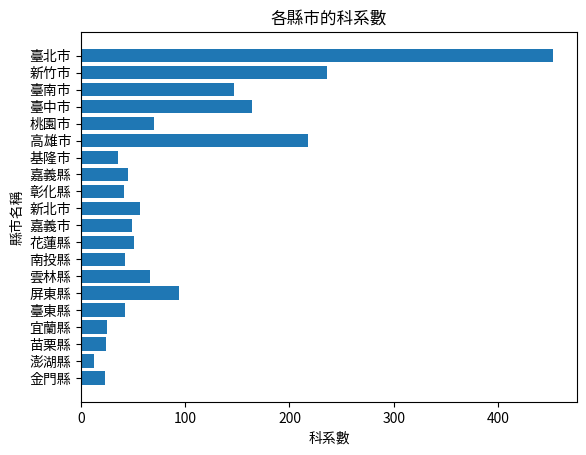


總共有 20 個縣市，總共有 1896 個科系，每個縣市平均有 94.80 個科系
其中科系數最多的縣市是 臺北市 有 453 個科系
其中科系數最少的縣市是 澎湖縣 有 13 個科系


In [ ]:
# 從df根據'學校名稱'，'科系代碼'和'縣市'欄位去除重複行，並將結果存在df8(dataframe)
# 將每個縣市名稱存到city_list(list)
# 計算每個縣市名稱對應的科系數，存到count(series)
df8=df.drop_duplicates(subset=['學校名稱','科系代碼','縣市'])
city_list=df8['縣市'].unique()
count=df8['縣市'].value_counts()

# 初始化列表department_per_city_list(list)以存儲每個縣市名稱的科系數
# 對city_list(list)中每個縣市名稱進行迴圈
# 印出每個縣市名稱對應的科系數
# 將每個縣市名稱對應的科系數加到department_per_city_list(list)
department_per_city_list=[]
for city in city_list:
  print(f"{city} 中總共有 {count[city]} 個科系")
  department_per_city_list.append(count[city])
print()

# 繪製水平條形圖，x軸為每個縣市名稱對應的科系數，y軸為縣市名稱
# 設置圖表標題為"各縣市的科系數"
# 設置x軸標籤為"科系數"
# 設置y軸標籤為"縣市名稱"
# 顯示圖表
plt.barh(city_list[::-1],department_per_city_list[::-1])
plt.title("各縣市的科系數")
plt.xlabel("科系數")
plt.ylabel("縣市名稱")
plt.show()

# 印出總共的縣市數、總科系數和每個縣市平均的科系數
# 印出科系數最多和最少的縣市和其科系數
print()
print(f"總共有 {len(city_list)} 個縣市，總共有 {sum(department_per_city_list)} 個科系，每個縣市平均有 {sum(department_per_city_list)/len(city_list):.2f} 個科系")
print(f"其中科系數最多的縣市是 {city_list[department_per_city_list.index(max(department_per_city_list))]} 有 {max(department_per_city_list)} 個科系")
print(f"其中科系數最少的縣市是 {city_list[department_per_city_list.index(min(department_per_city_list))]} 有 {min(department_per_city_list)} 個科系")

# 9. 各縣市的師生比例分別為何？



臺北市 中各學校的師生比為 1:22.14
新竹市 中各學校的師生比為 1:21.43
臺南市 中各學校的師生比為 1:19.57
臺中市 中各學校的師生比為 1:29.03
桃園市 中各學校的師生比為 1:22.21
高雄市 中各學校的師生比為 1:28.0
基隆市 中各學校的師生比為 1:22.81
嘉義縣 中各學校的師生比為 1:23.17
彰化縣 中各學校的師生比為 1:24.26
新北市 中各學校的師生比為 1:31.22
嘉義市 中各學校的師生比為 1:24.59
花蓮縣 中各學校的師生比為 1:23.79
南投縣 中各學校的師生比為 1:26.65
雲林縣 中各學校的師生比為 1:30.18
屏東縣 中各學校的師生比為 1:26.56
臺東縣 中各學校的師生比為 1:24.3
宜蘭縣 中各學校的師生比為 1:27.15
苗栗縣 中各學校的師生比為 1:30.12
澎湖縣 中各學校的師生比為 1:24.79
金門縣 中各學校的師生比為 1:29.35



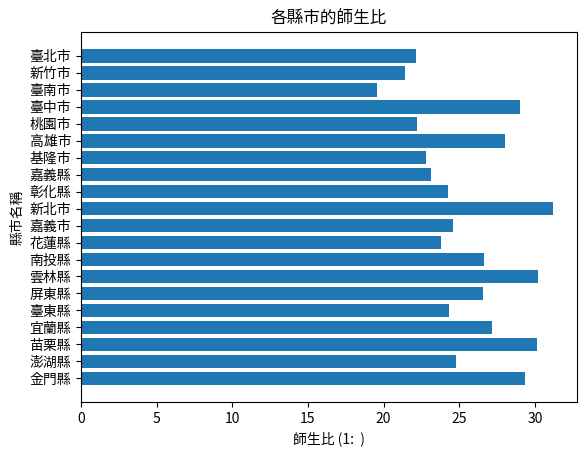


每個縣市平均的師生比為 1:25.57
其中師生比最高的縣市是 新北市 師生比為 1:31.22
其中師生比最低的縣市是 臺南市 師生比為 1:19.57


In [ ]:
# 從df中選擇'縣市'，'學生數'和'教師數'欄位，並存在df9(dataframe)
# 依照'縣市'欄位對df9進行分組，並對'學生數'和'教師數'進行求和
df9=df[['縣市','學生數','教師數']]
df9=df9.groupby(by=["縣市"]).sum()

# 初始化列表stratio_per_city_list(list)以存儲每個縣市名稱對應的師生比
# 對city_list(list)中每個縣市名稱進行迴圈
# 對df9的索引進行迴圈
# 若df9的索引為指定的縣市名稱(確保city_list(list)和stratio_per_city_list(list)的排序是一樣的，因為groupby回傳的資料會依大到小排序)
# 印出每個縣市名稱對應的師生比
# 將每個縣市名稱對應的師生比加到stratio_per_city_list(list)
stratio_per_city_list=[]
for city in city_list:
  for i in range(len(df9)):
    if df9.index[i]==city:
      print(f"{city} 中各學校的師生比為 1:{round(df9['學生數'][i]/df9['教師數'][i],2)}")
      stratio_per_city_list.append(round(df9['學生數'][i]/df9['教師數'][i],2))
print()

# 繪製水平條形圖，x軸為每個縣市名稱對應的師生比，y軸為縣市名稱
# 設置圖表標題為"各縣市的師生比
# 設置x軸標籤為師生比 (1:  )
# 設置y軸標籤為縣市名稱
# 顯示圖表
plt.barh(city_list[::-1],stratio_per_city_list[::-1])
plt.title("各縣市的師生比")
plt.xlabel("師生比 (1:  )")
plt.ylabel("縣市名稱")
plt.show()

# 印出每個縣市平均的師生比
# 印出師生比最多和最少的縣市和其師生比
print()
print(f"每個縣市平均的師生比為 1:{sum(stratio_per_city_list)/len(city_list):.2f}")
print(f"其中師生比最高的縣市是 {city_list[stratio_per_city_list.index(max(stratio_per_city_list))]} 師生比為 1:{max(stratio_per_city_list)}")
print(f"其中師生比最低的縣市是 {city_list[stratio_per_city_list.index(min(stratio_per_city_list))]} 師生比為 1:{min(stratio_per_city_list)}")

# 10. 各縣市的總科系數與師生比的關係為何？

臺北市 中總共有 453 個科系，師生比例為 1:22.14
新竹市 中總共有 236 個科系，師生比例為 1:21.43
臺南市 中總共有 147 個科系，師生比例為 1:19.57
臺中市 中總共有 164 個科系，師生比例為 1:29.03
桃園市 中總共有 70 個科系，師生比例為 1:22.21
高雄市 中總共有 218 個科系，師生比例為 1:28.0
基隆市 中總共有 36 個科系，師生比例為 1:22.81
嘉義縣 中總共有 45 個科系，師生比例為 1:23.17
彰化縣 中總共有 41 個科系，師生比例為 1:24.26
新北市 中總共有 57 個科系，師生比例為 1:31.22
嘉義市 中總共有 49 個科系，師生比例為 1:24.59
花蓮縣 中總共有 51 個科系，師生比例為 1:23.79
南投縣 中總共有 42 個科系，師生比例為 1:26.65
雲林縣 中總共有 66 個科系，師生比例為 1:30.18
屏東縣 中總共有 94 個科系，師生比例為 1:26.56
臺東縣 中總共有 42 個科系，師生比例為 1:24.3
宜蘭縣 中總共有 25 個科系，師生比例為 1:27.15
苗栗縣 中總共有 24 個科系，師生比例為 1:30.12
澎湖縣 中總共有 13 個科系，師生比例為 1:24.79
金門縣 中總共有 23 個科系，師生比例為 1:29.35



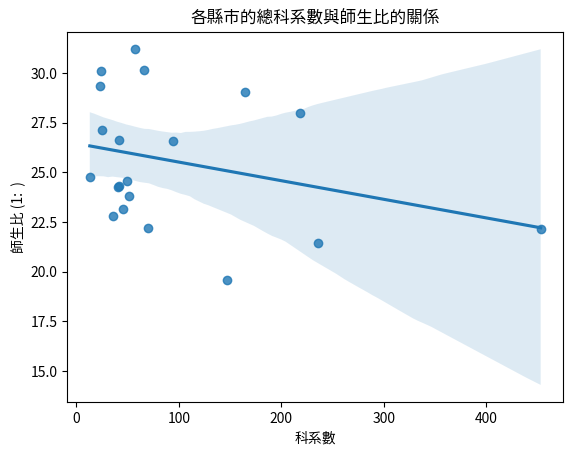


各縣市的總科系數與師生比的相關係數為 -0.3 屬於 低度負相關


In [ ]:
# 建立一個包含每個縣市名稱對應的科系數和師生比例的資料city_stratio(dataframe)
city_stratio=pd.DataFrame({
    "department":department_per_city_list,
    "stratio":stratio_per_city_list
})

# 印出每個縣市名稱對應的科系數和師生比
for i in range(len(city_list)):
  print(f"{city_list[i]} 中總共有 {department_per_city_list[i]} 個科系，師生比例為 1:{stratio_per_city_list[i]}")
print()

# 繪製每個縣市名稱對應的科系數和師生比之間的回歸圖
# 設置圖表標題為"各大學的總科系數與師生比的關係"
# 設置x軸標籤為"科系數"
# 設置y軸標籤為"師生比 (1:  )""
# 顯示圖表
sns.regplot(data=city_stratio,x=city_stratio['department'],y=city_stratio['stratio'])
plt.title("各縣市的總科系數與師生比的關係")
plt.xlabel("科系數")
plt.ylabel("師生比 (1:  )")
plt.show()

# 印出各縣市的總科系數與師生比的相關係數和其相關性
print()
print(f"各縣市的總科系數與師生比的相關係數為 {round(city_stratio.corr()['department'][1],2)} 屬於 {corrtype(round(city_stratio.corr()['department'][1],2))}")